In [159]:
import os
import mlflow

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [40]:
df = pd.read_pickle('../data/cardatas.pkl').sample(frac=0.1, random_state = 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 99 to 3
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       30 non-null     object 
 1   Year           30 non-null     int64  
 2   Selling_Price  30 non-null     float16
 3   Present_Price  30 non-null     float16
 4   Driven_kms     30 non-null     int64  
 5   Fuel_Type      30 non-null     object 
 6   Selling_type   30 non-null     object 
 7   Transmission   30 non-null     object 
 8   Owner          30 non-null     int32  
dtypes: float16(2), int32(1), int64(2), object(4)
memory usage: 1.9+ KB


In [41]:
df = df.rename(columns={'Present_Price': 'target'})


In [42]:
df

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Car_Name,Year,Selling_Price,target,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
99,fortuner,2010,9.648438,20.453125,50024,Diesel,Dealer,Manual,0
161,TVS Apache RTR 180,2014,0.449951,0.826172,23000,Petrol,Individual,Manual,0
89,etios g,2014,4.750000,6.761719,40000,Petrol,Dealer,Manual,0
30,ritz,2012,3.099609,5.980469,51439,Diesel,Dealer,Manual,0
232,elantra,2015,11.453125,14.789062,12900,Petrol,Dealer,Automatic,0
290,amaze,2014,4.500000,6.398438,19000,Petrol,Dealer,Manual,0
35,sx4,2011,2.949219,7.738281,49998,CNG,Dealer,Manual,0
7,s cross,2015,6.500000,8.609375,33429,Diesel,Dealer,Manual,0
183,Bajaj Discover 100,2013,0.270020,0.469971,21000,Petrol,Individual,Manual,0
13,ertiga,2015,6.101562,7.710938,26000,Petrol,Dealer,Manual,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=2)

In [44]:
X_train.iloc[0]

Car_Name             ritz
Year                 2012
Selling_Price    3.099609
Driven_kms          51439
Fuel_Type          Diesel
Selling_type       Dealer
Transmission       Manual
Owner                   0
Name: 30, dtype: object

In [45]:
cat_features = X_train.select_dtypes(include=['category','object']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [46]:
num_features = X_train.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Driven_kms', 'Owner']

In [47]:
s_scaler = StandardScaler()
l_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999) # unknown_value нужно выбирать с умом
regressor = RandomForestRegressor()

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('cat', l_encoder, cat_features), # преобразования для категориальных признаков
    ],
    remainder='drop' )

In [49]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', regressor)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor())])

In [50]:
predictions = pipeline.predict(X_test) 

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

{'mae': 2.2985903930664064,
 'mape': 0.30923050801363555,
 'mse': 11.002570988113433}

In [52]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

registry_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"
tracking_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"

mlflow.set_tracking_uri(tracking_uri)   
mlflow.set_registry_uri(registry_uri)  

In [53]:
EXPERIMENT_NAME = "car_project"
RUN_NAME = "baseline model"
REGISTRY_MODEL_NAME = "car_model_rf"

In [54]:
from mlflow.models import infer_signature

signature =  infer_signature(model_input = X_train.head(5))
input_example = X_train.head(5)

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/mlflow/types/utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [55]:
req_file = '../requirements.txt'
art = 'comment.txt'

In [56]:
params_dict = pipeline.get_params()


In [60]:
# Когда создаем новый эксперимент, то: 
#experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)

# Впоследствии. чтобы добавлять запуски в этот же эксепримент мы должны получить его id:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name = REGISTRY_MODEL_NAME
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(params_dict)

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'car_model_rf' already exists. Creating a new version of this model...
2024/12/15 22:33:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: car_model_rf, version 3


🏃 View run baseline model at: http://127.0.0.1:5000/#/experiments/1/runs/8765c492ef56453d8d4c2fbffc70dfe2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '3' of model 'car_model_rf'.


In [61]:
regressor2 = RandomForestRegressor(n_estimators=10, max_depth=6)

In [62]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', regressor2)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(max_depth=6, n_estimators=10))])

In [63]:
predictions = pipeline.predict(X_test) 
metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

{'mae': 2.618438720703125,
 'mape': 0.4028364855682557,
 'mse': 12.410609362423418}

In [64]:
RUN_NAME = 'smaller_model'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name = REGISTRY_MODEL_NAME
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'car_model_rf' already exists. Creating a new version of this model...
2024/12/15 22:37:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: car_model_rf, version 4


🏃 View run smaller_model at: http://127.0.0.1:5000/#/experiments/1/runs/e7afa15bbad24db08193a1716adf3695
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '4' of model 'car_model_rf'.


In [65]:
RUN_NAME = 'no_model'
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.log_artifact(art)


run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

🏃 View run no_model at: http://127.0.0.1:5000/#/experiments/1/runs/52fa02e1f30e43af8460c5d4d44f2b2e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [67]:
run_id = '52fa02e1f30e43af8460c5d4d44f2b2e' # Указываем run id
mlflow.register_model(f"runs:/{run_id}/models", REGISTRY_MODEL_NAME)

Registered model 'car_model_rf' already exists. Creating a new version of this model...
2024/12/15 22:39:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: car_model_rf, version 6
Created version '6' of model 'car_model_rf'.


<ModelVersion: aliases=[], creation_timestamp=1734291593134, current_stage='None', description='', last_updated_timestamp=1734291593134, name='car_model_rf', run_id='52fa02e1f30e43af8460c5d4d44f2b2e', run_link='', source='mlflow-artifacts:/1/52fa02e1f30e43af8460c5d4d44f2b2e/artifacts/models', status='READY', status_message='', tags={}, user_id='', version='6'>

In [68]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name='register_at_run', experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name = REGISTRY_MODEL_NAME # Указываем для какой модели регистрируем
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'car_model_rf' already exists. Creating a new version of this model...
2024/12/15 22:40:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: car_model_rf, version 7


🏃 View run register_at_run at: http://127.0.0.1:5000/#/experiments/1/runs/b4d5d856250c4f829fc86042c52e79a8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '7' of model 'car_model_rf'.


In [69]:
model_reg = mlflow.search_registered_models()
model_reg[0]

<RegisteredModel: aliases={}, creation_timestamp=1734290904886, description='', last_updated_timestamp=1734291612992, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1734291612992, current_stage='None', description='', last_updated_timestamp=1734291612992, name='car_model_rf', run_id='b4d5d856250c4f829fc86042c52e79a8', run_link='', source='mlflow-artifacts:/1/b4d5d856250c4f829fc86042c52e79a8/artifacts/models', status='READY', status_message='', tags={}, user_id='', version='7'>], name='car_model_rf', tags={}>

In [70]:
model_name = REGISTRY_MODEL_NAME
model_version = 1

model_loaded = mlflow.sklearn.load_model(model_uri=f"models:/{model_name}/{model_version}")

In [71]:
model_loaded.predict(X_test.iloc[0:1])

array([1.57690674])

In [72]:
y_test.iloc[0]

np.float16(0.826)

In [73]:
from sklearn.preprocessing import QuantileTransformer, SplineTransformer, PolynomialFeatures, MinMaxScaler

In [74]:
X_train_sklearn = X_train.copy()

In [75]:
pf = PolynomialFeatures(degree=2)

In [76]:
X_train_sklearn

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Car_Name,Year,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
30,ritz,2012,3.099609,51439,Diesel,Dealer,Manual,0
112,KTM 390 Duke,2014,1.150391,7000,Petrol,Individual,Manual,0
290,amaze,2014,4.500000,19000,Petrol,Dealer,Manual,0
192,Hero Hunk,2007,0.199951,49000,Petrol,Individual,Manual,1
178,TVS Jupyter,2014,0.350098,19000,Petrol,Individual,Automatic,0
232,elantra,2015,11.453125,12900,Petrol,Dealer,Automatic,0
269,city,2015,6.699219,18828,Petrol,Dealer,Manual,0
130,Honda CB Hornet 160R,2017,0.750000,11000,Petrol,Individual,Manual,0
216,eon,2016,2.900391,12500,Petrol,Dealer,Manual,0
29,ciaz,2015,7.449219,45000,Diesel,Dealer,Manual,0


In [77]:
pf.fit_transform(X_train_sklearn[['Selling_Price','Driven_kms']])

array([[1.00000000e+00, 3.09960938e+00, 5.14390000e+04, 9.60757828e+00,
        1.59440807e+05, 2.64597072e+09],
       [1.00000000e+00, 1.15039062e+00, 7.00000000e+03, 1.32339859e+00,
        8.05273438e+03, 4.90000000e+07],
       [1.00000000e+00, 4.50000000e+00, 1.90000000e+04, 2.02500000e+01,
        8.55000000e+04, 3.61000000e+08],
       [1.00000000e+00, 1.99951172e-01, 4.90000000e+04, 3.99804711e-02,
        9.79760742e+03, 2.40100000e+09],
       [1.00000000e+00, 3.50097656e-01, 1.90000000e+04, 1.22568369e-01,
        6.65185547e+03, 3.61000000e+08],
       [1.00000000e+00, 1.14531250e+01, 1.29000000e+04, 1.31174072e+02,
        1.47745312e+05, 1.66410000e+08],
       [1.00000000e+00, 6.69921875e+00, 1.88280000e+04, 4.48795319e+01,
        1.26132891e+05, 3.54493584e+08],
       [1.00000000e+00, 7.50000000e-01, 1.10000000e+04, 5.62500000e-01,
        8.25000000e+03, 1.21000000e+08],
       [1.00000000e+00, 2.90039062e+00, 1.25000000e+04, 8.41226578e+00,
        3.62548828e+04, 

In [78]:
sp = SplineTransformer(n_knots=3, degree=3)

In [79]:
sp.fit_transform(X_train_sklearn[['Driven_kms']])

array([[0.00000000e+00, 1.96918759e-02, 4.73330615e-01, 4.84959439e-01,
        2.20180702e-02],
       [8.77257193e-02, 6.33146573e-01, 2.77937103e-01, 1.19060441e-03,
        0.00000000e+00],
       [1.53757727e-02, 4.48550323e-01, 5.08623889e-01, 2.74500161e-02,
        0.00000000e+00],
       [0.00000000e+00, 2.97363884e-02, 5.17402632e-01, 4.38948534e-01,
        1.39124456e-02],
       [1.53757727e-02, 4.48550323e-01, 5.08623889e-01, 2.74500161e-02,
        0.00000000e+00],
       [4.21911202e-02, 5.56476296e-01, 3.93066639e-01, 8.26594428e-03,
        0.00000000e+00],
       [1.59019182e-02, 4.51835791e-01, 5.05570811e-01, 2.66914795e-02,
        0.00000000e+00],
       [5.44874257e-02, 5.84932785e-01, 3.55561043e-01, 5.01874714e-03,
        0.00000000e+00],
       [4.46072245e-02, 5.62721536e-01, 3.85179698e-01, 7.49154092e-03,
        0.00000000e+00],
       [0.00000000e+00, 5.27485986e-02, 5.81370116e-01, 3.60495453e-01,
        5.38583211e-03],
       [3.09257058e-02, 5.2173

In [80]:
qt = QuantileTransformer()

In [81]:
qt.fit_transform(X_train_sklearn[['Driven_kms']])

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.95238095],
       [0.0952381 ],
       [0.5       ],
       [0.9047619 ],
       [0.5       ],
       [0.28571429],
       [0.42857143],
       [0.19047619],
       [0.23809524],
       [0.83333333],
       [0.38095238],
       [0.76190476],
       [0.71428571],
       [0.57142857],
       [0.14285714],
       [1.        ],
       [0.83333333],
       [0.33333333],
       [0.04761905],
       [0.66666667],
       [0.        ],
       [0.61904762]])

In [82]:
pf = PolynomialFeatures(degree=2)
qt = QuantileTransformer()
sp = SplineTransformer(n_knots=3, degree=3)

In [83]:
pf_pipeline = Pipeline(steps=[
    ('poly', pf),
    ('scale', StandardScaler())
])

In [84]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('cat', l_encoder, cat_features), # преобразования для категориальных признаков
        ('quantile', qt,num_features),
        ('poly', pf_pipeline, ['Selling_Price', 'Driven_kms']), # В преобразования добавляем созданный ранее pipeline
        ('spline', sp, ['Driven_kms'])
    ],
    remainder='drop',
    ) 

In [85]:
X_train_sklearn[['Selling_Price', 'Driven_kms']] = X_train_sklearn[['Selling_Price', 'Driven_kms']].astype('float128')
X_train_sklearn[['Selling_Price', 'Driven_kms']] = X_train_sklearn[['Selling_Price', 'Driven_kms']].astype('float128')

In [86]:
X_train_sklearn_raw = preprocessor_sklearn.fit_transform(X_train_sklearn)
X_train_sklearn = pd.DataFrame(X_train_sklearn_raw, columns=preprocessor_sklearn.get_feature_names_out())

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(


In [87]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display (X_train_sklearn)

,num__Year,num__Selling_Price,num__Driven_kms,num__Owner,cat__Car_Name,cat__Fuel_Type,cat__Selling_type,cat__Transmission,quantile__Year,quantile__Selling_Price,quantile__Driven_kms,quantile__Owner,poly__1,poly__Selling_Price,poly__Driven_kms,poly__Selling_Price^2,poly__Selling_Price Driven_kms,poly__Driven_kms^2,spline__Driven_kms_sp_0,spline__Driven_kms_sp_1,spline__Driven_kms_sp_2,spline__Driven_kms_sp_3,spline__Driven_kms_sp_4
0,-1.083147,-0.152813,1.539885,-0.218218,18.0,0.0,0.0,1.0,0.095238,0.571429,0.952381,0.0,0.0,-0.152813,1.539885,-0.421637,0.249445,1.505705,0.000000,0.019692,0.473331,0.484959,0.022018
1,-0.148667,-0.704468,-1.008055,-0.218218,6.0,1.0,1.0,1.0,0.309524,0.428571,0.095238,0.0,0.0,-0.704468,-1.008055,-0.638270,-0.635962,-0.744785,0.087726,0.633147,0.277937,0.001191,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.785812,-0.826214,-1.380737,-0.218218,1.0,1.0,1.0,1.0,0.833333,0.333333,0.000000,0.0,0.0,-0.826214,-1.380737,-0.659312,-0.680954,-0.787031,0.166667,0.666667,0.166667,0.000000,0.000000
21,-0.615907,-0.953625,-0.205356,-0.218218,2.0,1.0,1.0,1.0,0.142857,0.047619,0.619048,0.0,0.0,-0.953625,-0.205356,-0.670970,-0.649896,-0.405085,0.010085,0.409772,0.542793,0.037350,0.000000


In [88]:
pipeline_sklearn = Pipeline(steps=[
    ('transform', preprocessor_sklearn),
    ('model', regressor)
])

model_sklearn = pipeline_sklearn.fit(X_train, y_train)

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(


In [89]:
model_sklearn

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('poly',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Selling_Price',
                                                   'Driven_kms']),
                                                 ('spline',
                                                  SplineTransformer(n_knots=3),
                                                  ['Driven_kms'])])),
                ('model', RandomForestRegressor())])

In [90]:
predictions = model_sklearn.predict(X_test) 
metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions)
metrics["mse"] = mean_squared_error(y_test, predictions)

metrics

{'mae': 1.9597467041015628,
 'mape': 0.20416066183275533,
 'mse': 9.340054033467174}

In [91]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'fe_sklearn'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(model_sklearn, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

🏃 View run fe_sklearn at: http://127.0.0.1:5000/#/experiments/1/runs/738f23bf2c8a4e4d9f2fdbd48f98819a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [98]:
from sklearn.feature_selection import RFE
X_train_sklearn


,num__Year,num__Selling_Price,num__Driven_kms,num__Owner,cat__Car_Name,cat__Fuel_Type,cat__Selling_type,cat__Transmission,quantile__Year,quantile__Selling_Price,...,poly__Selling_Price,poly__Driven_kms,poly__Selling_Price^2,poly__Selling_Price Driven_kms,poly__Driven_kms^2,spline__Driven_kms_sp_0,spline__Driven_kms_sp_1,spline__Driven_kms_sp_2,spline__Driven_kms_sp_3,spline__Driven_kms_sp_4
0,-1.083147,-0.152813,1.539885,-0.218218,18.0,0.0,0.0,1.0,0.095238,0.571429,...,-0.152813,1.539885,-0.421637,0.249445,1.505705,0.000000,0.019692,0.473331,0.484959,0.022018
1,-0.148667,-0.704468,-1.008055,-0.218218,6.0,1.0,1.0,1.0,0.309524,0.428571,...,-0.704468,-1.008055,-0.638270,-0.635962,-0.744785,0.087726,0.633147,0.277937,0.001191,0.000000
2,-0.148667,0.243516,-0.320027,-0.218218,10.0,1.0,0.0,1.0,0.309524,0.619048,...,0.243516,-0.320027,-0.143337,-0.183005,-0.474411,0.015376,0.448550,0.508624,0.027450,0.000000
3,-3.419346,-0.973456,1.400043,4.582576,3.0,1.0,1.0,1.0,0.000000,0.000000,...,-0.973456,1.400043,-0.671831,-0.625757,1.293418,0.000000,0.029736,0.517403,0.438949,0.013912
4,-0.148667,-0.930962,-0.320027,-0.218218,7.0,1.0,1.0,0.0,0.309524,0.095238,...,-0.930962,-0.320027,-0.669671,-0.644156,-0.474411,0.015376,0.448550,0.508624,0.027450,0.000000
5,0.318573,2.211345,-0.669774,-0.218218,14.0,1.0,0.0,0.0,0.595238,1.000000,...,2.211345,-0.669774,2.757340,0.181042,-0.643040,0.042191,0.556476,0.393067,0.008266,0.000000
6,0.318573,0.865925,-0.329889,-0.218218,12.0,1.0,0.0,1.0,0.595238,0.809524,...,0.865925,-0.329889,0.500728,0.054640,-0.480050,0.015902,0.451836,0.505571,0.026691,0.000000
7,1.253052,-0.817784,-0.778712,-0.218218,5.0,1.0,1.0,1.0,1.000000,0.380952,...,-0.817784,-0.778712,-0.658167,-0.634809,-0.682391,0.054487,0.584933,0.355561,0.005019,0.000000
8,0.785812,-0.209195,-0.692709,-0.218218,15.0,1.0,0.0,1.0,0.833333,0.523810,...,-0.209195,-0.692709,-0.452895,-0.471020,-0.651844,0.044607,0.562722,0.385180,0.007492,0.000000
9,0.318573,1.078185,1.170701,-0.218218,11.0,0.0,0.0,1.0,0.595238,0.857143,...,1.078185,1.170701,0.778215,1.277475,0.967583,0.000000,0.052749,0.581370,0.360495,0.005386


In [99]:
rfe_skl_selector = RFE(estimator=regressor, n_features_to_select=12, step = 0.2) #drop 20% of features each iteration
X_train_skl_rfe = rfe_skl_selector.fit_transform(X_train_sklearn,y_train)

In [100]:
X_train_skl_rfe = pd.DataFrame(X_train_skl_rfe, columns=rfe_skl_selector.get_feature_names_out())
X_train_skl_rfe

,num__Selling_Price,cat__Car_Name,cat__Selling_type,quantile__Year,quantile__Selling_Price,quantile__Driven_kms,poly__Selling_Price,poly__Driven_kms,poly__Selling_Price^2,poly__Selling_Price Driven_kms,spline__Driven_kms_sp_1,spline__Driven_kms_sp_2
0,-0.152813,18.0,0.0,0.095238,0.571429,0.952381,-0.152813,1.539885,-0.421637,0.249445,0.019692,0.473331
1,-0.704468,6.0,1.0,0.309524,0.428571,0.095238,-0.704468,-1.008055,-0.638270,-0.635962,0.633147,0.277937
2,0.243516,10.0,0.0,0.309524,0.619048,0.500000,0.243516,-0.320027,-0.143337,-0.183005,0.448550,0.508624
3,-0.973456,3.0,1.0,0.000000,0.000000,0.904762,-0.973456,1.400043,-0.671831,-0.625757,0.029736,0.517403
4,-0.930962,7.0,1.0,0.309524,0.095238,0.500000,-0.930962,-0.320027,-0.669671,-0.644156,0.448550,0.508624
5,2.211345,14.0,0.0,0.595238,1.000000,0.285714,2.211345,-0.669774,2.757340,0.181042,0.556476,0.393067
6,0.865925,12.0,0.0,0.595238,0.809524,0.428571,0.865925,-0.329889,0.500728,0.054640,0.451836,0.505571
7,-0.817784,5.0,1.0,1.000000,0.380952,0.190476,-0.817784,-0.778712,-0.658167,-0.634809,0.584933,0.355561
8,-0.209195,15.0,0.0,0.833333,0.523810,0.238095,-0.209195,-0.692709,-0.452895,-0.471020,0.562722,0.385180
9,1.078185,11.0,0.0,0.595238,0.857143,0.833333,1.078185,1.170701,0.778215,1.277475,0.052749,0.581370


In [101]:
rfe_cols = X_train_skl_rfe.columns.tolist()
rfe_cols


['num__Selling_Price',
 'cat__Car_Name',
 'cat__Selling_type',
 'quantile__Year',
 'quantile__Selling_Price',
 'quantile__Driven_kms',
 'poly__Selling_Price',
 'poly__Driven_kms',
 'poly__Selling_Price^2',
 'poly__Selling_Price Driven_kms',
 'spline__Driven_kms_sp_1',
 'spline__Driven_kms_sp_2']

In [102]:
rfe_idx = rfe_skl_selector.support_
rfe_idx

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False])

In [103]:
# Отбираемые столбцы нужно залогировать, иначе мы потеряем информацию о том, какие призныки выбраны
with open('rfe_skl_idx.txt', 'w+') as f:
    f.write(str(rfe_idx))
with open('rfe_skl_cols.txt', 'w+') as f:
    f.write(str(rfe_cols))

In [104]:
class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        return X[:,self.cols]
    
    def fit(self, X, y=None):
        return self


In [106]:
rfe_skl_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_idx)),
    ('model', regressor)
])

rfe_skl_pipeline.fit(X_train, y_train)

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('poly',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Selling_Price',
                                                   'Driven_kms']),
                                                 ('spline',
                                                  SplineTransformer(n_knots=3),
                                                  ['Driven_kms'])])),
                ('rfe_extractor',
                 <__main__.ColumnExtractor object at 0x7c36557ae320>),
                ('model', RandomForestRegressor())])

In [111]:
predictions_rfe_skl = rfe_skl_pipeline.predict(X_test)

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions_rfe_skl)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions_rfe_skl)
metrics["mse"] = mean_squared_error(y_test, predictions_rfe_skl)

metrics
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_skl_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_skl_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

🏃 View run rfe_skl_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/1da87f10429a4e73be9507757a55ddd5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector 

In [114]:
sfs = SequentialFeatureSelector(RandomForestRegressor(n_estimators=3), 
                                k_features=3,
                                forward=True,
                                floating=False, # True to drop selected features
                                scoring='neg_mean_absolute_error',
                                cv=2)

sfs.fit(X_train_sklearn,y_train)

SequentialFeatureSelector(cv=2, estimator=RandomForestRegressor(n_estimators=3),
                          k_features=(3, 3), scoring='neg_mean_absolute_error')

In [115]:
selected_features_sfs = X_train_sklearn.loc[:, sfs.k_feature_names_]
selected_features_sfs

,cat__Fuel_Type,cat__Selling_type,poly__Selling_Price
0,0.0,0.0,-0.152813
1,1.0,1.0,-0.704468
2,1.0,0.0,0.243516
3,1.0,1.0,-0.973456
4,1.0,1.0,-0.930962
5,1.0,0.0,2.211345
6,1.0,0.0,0.865925
7,1.0,1.0,-0.817784
8,1.0,0.0,-0.209195
9,0.0,0.0,1.078185


In [116]:
rfe_sfs_idx = list(sfs.k_feature_idx_)
rfe_sfs_idx
rfe_sfs_col = list(sfs.k_feature_names_)
rfe_sfs_col

['cat__Fuel_Type', 'cat__Selling_type', 'poly__Selling_Price']

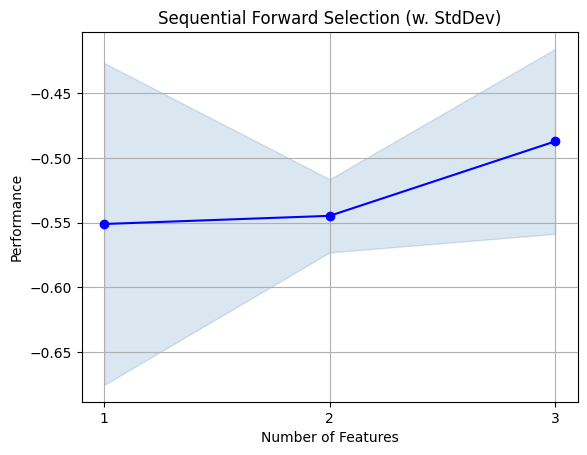

In [117]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [118]:
rfe_sfs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', regressor)
])

rfe_sfs_pipeline.fit(X_train, y_train)

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=99999999),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['Year', 'Selling_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('poly',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Selling_Price',
                                                   'Driven_kms']),
                                                 ('spline',
                                                  SplineTransformer(n_knots=3),
                                                  ['Driven_kms'])])),
                ('rfe_extractor',
                 <__main__.ColumnExtractor object at 0x7c3656e8ed10>),
                ('model', RandomForestRegressor())])

In [119]:
predictions_sfs = rfe_sfs_pipeline.predict(X_test)

metrics = {}
metrics["mae"] = mean_absolute_error(y_test, predictions_sfs)   
metrics["mape"] = mean_absolute_percentage_error(y_test, predictions_sfs)
metrics["mse"] = mean_squared_error(y_test, predictions_sfs)

metrics
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_sfs_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_sfs_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

🏃 View run rfe_sfs_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/d7fa40cd5c9e4710a0d1d4d9e9c25e85
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [163]:
from sklearn.model_selection import  GridSearchCV

In [165]:
param_grid = {
    'model__max_depth': [i for i in range(1,10)],
    'model__n_estimators':[i for i in range(1,5)],
    'model__max_features':[i/10 for i in range(1,10)]
}

In [168]:
gs = GridSearchCV(rfe_sfs_pipeline, param_grid, cv=2, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (11). n_quantiles is set to n_samples.
  warnings.warn(
/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (11). n_quantiles is set to n_samples.
  warnings.warn(
/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (11). n_quantiles is set to n_samples.
  warnings.warn(
/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (11). n_quantiles is set to n_samples.
  warnings.warn(
/home/mainuser/Desktop/main/

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Selling_Price',
                                                                          'Driven_kms',
                                                                          'Owner']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=99999999),
                                                                         ['Car_Name',
                                                                          'Fuel_Type',
                                                                          'Selling_type',
                                                                          'Transmission']),
                                                                        ('quantile',
                                                                         QuantileTransformer(),
                                                                         ['Year',
                                                                          'Selling...
                                                                          'Driven_kms']),
                                                                        ('spline',
                                                                         SplineTransformer(n_knots=3),
                                                                         ['Driven_kms'])])),
                                       ('rfe_extractor',
                                        <__main__.ColumnExtractor object at 0x7c3656e8ed10>),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'model__max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                 0.7, 0.8, 0.9],
                         'model__n_estimators': [1, 2, 3, 4]},
             scoring='neg_mean_absolute_error')

In [170]:
print("Лучшие гиперпараметры:", gs.best_params_)

Лучшие гиперпараметры: {'model__max_depth': 3, 'model__max_features': 0.9, 'model__n_estimators': 3}


In [175]:
gs_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', regressor)
])

In [137]:
import optuna

In [143]:
def objective(trial):
    # предлагаем гиперпараметры
    depth = trial.suggest_int('depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)

    # создаём и обучаем модель
    opt_pipeline  = Pipeline(steps=[
        ('preprocessor', preprocessor_sklearn), 
        ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
        ('model', regressor)
    ])

    opt_pipeline.fit(X_train, y_train)

    # предсказываем и вычисляем RMSE
    preds = opt_pipeline.predict(X_test)
    mae =  mean_absolute_error(y_test, preds)   

    return mae

In [144]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# выводим результаты
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params) 

[I 2024-12-15 23:35:05,977] A new study created in memory with name: no-name-295bfc7b-2d04-47fd-a392-df1ef8c41799


/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(
[I 2024-12-15 23:35:06,074] Trial 0 finished with value: 1.8488555908203126 and parameters: {'depth': 4, 'learning_rate': 0.04817876392698694}. Best is trial 0 with value: 1.8488555908203126.
/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (22). n_quantiles is set to n_samples.
  warnings.warn(
[I 2024-12-15 23:35:06,156] Trial 1 finished with value: 1.8209912109375002 and parameters: {'depth': 1, 'learning_rate': 0.02852006097329306}. Best is trial 1 with value: 1.8209912109375002.
/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quan

Number of finished trials: 10
Best trial: {'depth': 5, 'learning_rate': 0.05396624355964157}


In [153]:
opt_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', regressor)
])

In [154]:
df = pd.read_pickle("../data/cardatas.pkl")
df = df.rename(columns={'Present_Price': 'target'})


In [155]:
Y = df['target']
X = df.drop('target', axis=1)

In [156]:
X

/home/mainuser/Desktop/main/neolex/.venv_lr1/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Car_Name,Year,Selling_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.349609,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.849609,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.601562,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.500000,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.000000,60000,Petrol,Dealer,Manual,0
298,city,2009,3.349609,87934,Petrol,Dealer,Manual,0
299,city,2017,11.500000,9000,Diesel,Dealer,Manual,0


In [157]:
predictions_sfs = rfe_sfs_pipeline.predict(X)

metrics = {}
metrics["mae"] = mean_absolute_error(Y, predictions_sfs)   
metrics["mape"] = mean_absolute_percentage_error(Y, predictions_sfs)
metrics["mse"] = mean_squared_error(Y, predictions_sfs)

metrics
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_sfs_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_sfs_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

🏃 View run rfe_sfs_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/6a4991b0933a4f8699cdcd3053657973
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [160]:
import pickle

In [161]:
model_prod = "model_prod.pkl"  

with open(model_prod, 'wb') as file:  
    pickle.dump(rfe_sfs_pipeline, file)